## Task-2 Prediction using Unsupervised ML

In [1]:
import pandas as pd
import numpy as np



In [2]:
#Loading the dataset
df = pd.read_csv(r'C:\Users\hp\Downloads\Spark foundation\MY SPARK\dataset\Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Data analysis

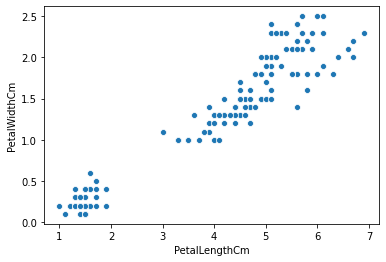

In [3]:
import seaborn as sns
#sns.pairplot(df)
sns.scatterplot(x = "PetalLengthCm", y = "PetalWidthCm", data = df)

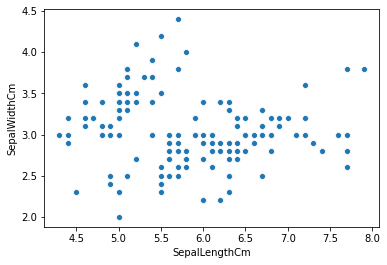

In [4]:
sns.scatterplot(x = "SepalLengthCm", y = "SepalWidthCm", data = df)

In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
x = df.iloc[:, [0, 1, 2, 3]].values

### Finding the optimal number of clusters

In [7]:
#Finding the optimal number of clusters
from sklearn.cluster import KMeans
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(x)
    sse.append(km.inertia_)
    
sse

[281831.54466666654,
 70581.3808,
 31357.65630492197,
 17773.729923769926,
 11452.996731321835,
 7921.973211538461,
 5924.564268115939,
 4559.091889060886,
 3587.420382352942]

Text(0, 0.5, 'Sum of Squared Error (SSE)')

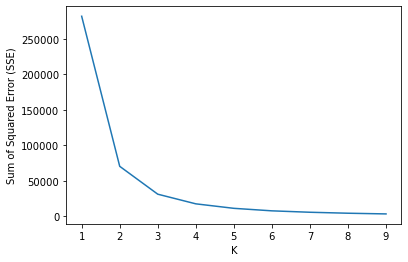

In [8]:
#Elbow plot
import matplotlib.pyplot as plt

plt.plot(k_rng, sse)
plt.xlabel('K')
plt.ylabel('Sum of Squared Error (SSE)')

### Training the model and visualizing result

In [9]:
#Model
km = KMeans(n_clusters = 3)
y_pred = km.fit_predict(x)

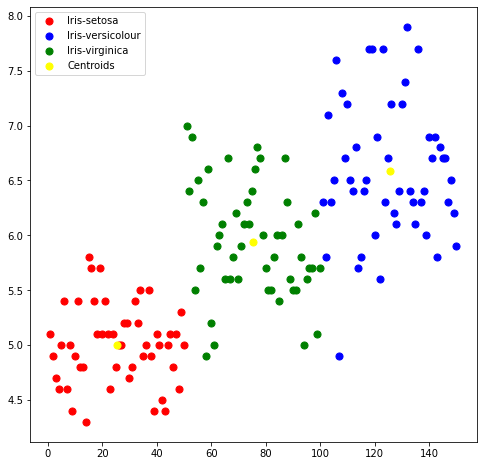

In [10]:
#Plotting the clusters
plt.figure(figsize=(8,8))
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], s = 50, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_pred == 2, 0], x[y_pred == 2, 1], s = 50, c = 'green', label = 'Iris-virginica')

#Plotting centroids of the clusters
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], s = 50, c = 'yellow', label = 'Centroids')

plt.legend()